In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from settings import Settings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from models import create_FM, create_FFM, create_WideDeep, create_DeepFM, create_DeepCross, create_xDeepFM, create_FNN, create_PNN

In [ ]:
settings = Settings()
df = pd.read_csv('data/train_1m.txt', sep='\t')
df = df.sample(n=100000, ignore_index=True)
df[settings.dense_feature] = df[settings.dense_feature].fillna(0)
df[settings.dense_feature] = MinMaxScaler().fit_transform(df[settings.dense_feature])
df[settings.cat_feature] = df[settings.cat_feature].fillna('-1')

# 生成数据集
BATCH_SIZE = 512
label = df.pop('label')

x_train, x_test, y_train, y_test = train_test_split(df, label, test_size=0.2)

train_ds = tf.data.Dataset.from_tensor_slices((dict(x_train), y_train)).batch(BATCH_SIZE)
test_ds = tf.data.Dataset.from_tensor_slices((dict(x_test), y_test)).batch(BATCH_SIZE)

In [3]:
model = create_PNN(df, settings)
model.compile( optimizer='adam', loss='binary_crossentropy', metrics=[keras.metrics.AUC()])

In [4]:
history = model.fit(train_ds, epochs=10, validation_data=test_ds)

Epoch 1/10
157/157 [==============================] - 28s 158ms/step - loss: 0.5782 - auc: 0.6841 - val_loss: 0.5161 - val_auc: 0.7486
Epoch 2/10
157/157 [==============================] - 24s 151ms/step - loss: 0.4717 - auc: 0.8141 - val_loss: 0.5665 - val_auc: 0.7246
Epoch 3/10
157/157 [==============================] - 24s 150ms/step - loss: 0.3650 - auc: 0.9111 - val_loss: 0.6679 - val_auc: 0.7008
Epoch 4/10
157/157 [==============================] - 24s 150ms/step - loss: 0.2922 - auc: 0.9511 - val_loss: 0.7648 - val_auc: 0.6893
Epoch 5/10
157/157 [==============================] - 24s 151ms/step - loss: 0.2658 - auc: 0.9630 - val_loss: 0.8354 - val_auc: 0.6756
Epoch 6/10
157/157 [==============================] - 24s 151ms/step - loss: 0.2729 - auc: 0.9619 - val_loss: 0.9115 - val_auc: 0.6806
Epoch 7/10
157/157 [==============================] - 24s 151ms/step - loss: 0.2712 - auc: 0.9644 - val_loss: 0.9330 - val_auc: 0.6768
Epoch 8/10
157/157 [==============================] - 2

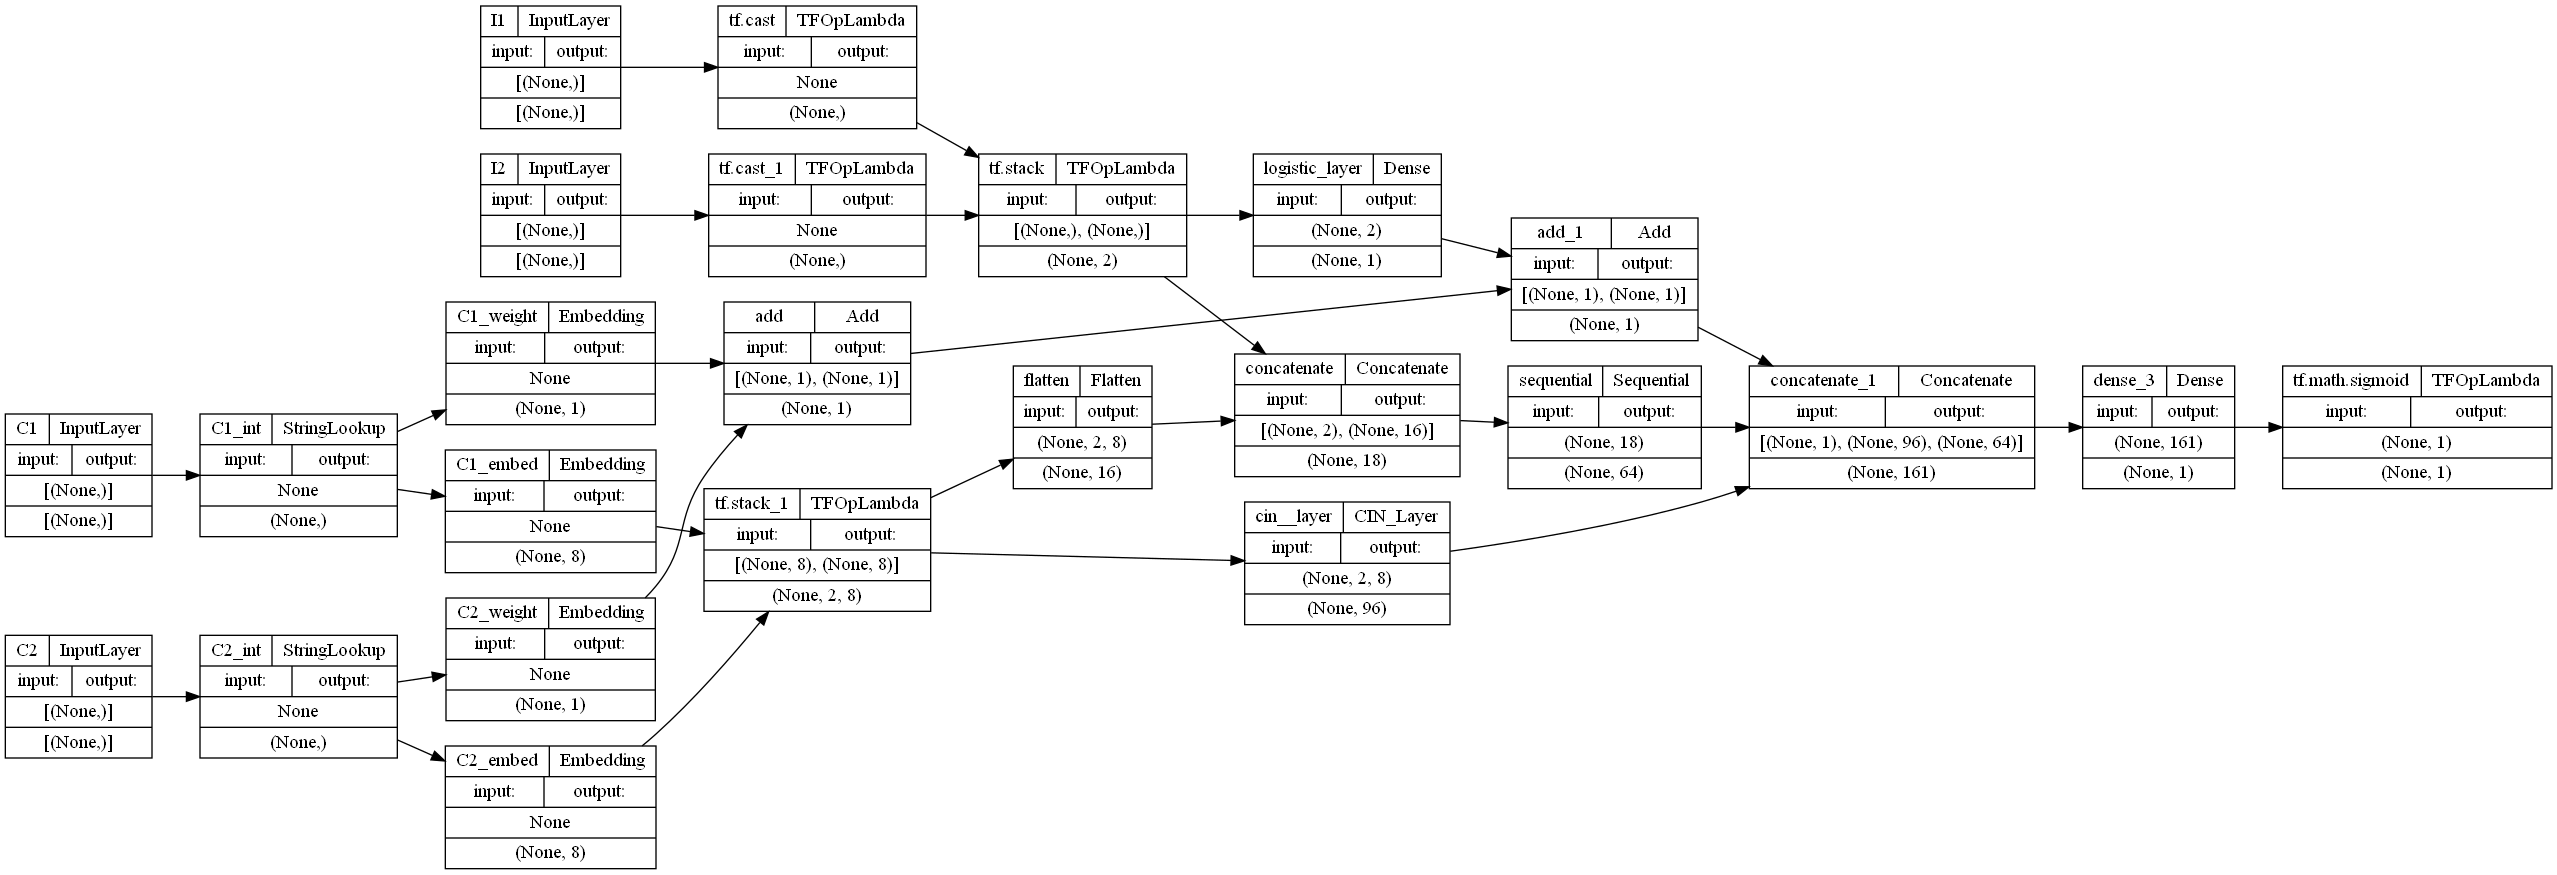

In [3]:
settings.dense_feature = ['I1', 'I2']
settings.cat_feature = ['C1', 'C2']
mini_df = df[settings.dense_feature+settings.cat_feature][:100]
model = create_FNN(mini_df, settings)
keras.utils.plot_model(model, to_file='FNN.png', show_shapes=True, rankdir='LR')

In [3]:
fm_model, fnn_model = create_FNN(df, settings)

fm_model.compile( optimizer='adam', loss='binary_crossentropy', metrics=[keras.metrics.AUC()])
fm_model.fit(train_ds, epochs=10, validation_data=test_ds)

fnn_model.compile( optimizer='adam', loss='binary_crossentropy', metrics=[keras.metrics.AUC()])
fnn_model.fit(train_ds, epochs=10, validation_data=test_ds)